<div id="divCheckbox" style="display: none;">
"20102020"[::-1]
</div>

<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools</div>
<div style="text-align: right">Ameya Apte (NUID 002764540), Aditya Sawant (NUID 002762104), Nainil Maladkar (NUID 002780019)</div>

# Assignment 6

Lets import the required libraries first

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We take into consideration the IPL cricket dataset for our analysis here. <br>
The dataset can be found at : https://www.kaggle.com/datasets/nowke9/ipldata

From this dataset, we would consider the `win_by_wickets` column

Lets first read the data from the csv file using the `read_csv` function from `pandas`

In [2]:
ipl_data = pd.read_csv("matches.csv")

Lets check the data using `head()` and `tail()`

In [3]:
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ipl_data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


Since the data may unknowingly have missing data in the form of `NaN`, lets cleanse the data and fill the `NaN`s with the mean using the `fillna()` function

In [5]:
ipl_data.fillna(value={'win_by_wickets': ipl_data.win_by_wickets.mean()}, inplace=True)
ipl_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary


Since, a team can never win over any other team in a cricket match by `0 wickets`, hence we only consider values greater than 0 in `win_by_wickets` column. 

We store this data in `win_by_wickets_data` 

In [6]:
win_by_wickets_data = ipl_data[ipl_data.win_by_wickets > 0].win_by_wickets  #removed zero
win_by_wickets_data

1       7
2      10
3       6
5       9
6       4
       ..
684     6
689     5
691     5
692     2
695     8
Name: win_by_wickets, Length: 371, dtype: int64

Now, lets just simply plot a histogram of the data obtained for our reference

Text(0.5, 1.0, 'Histogram')

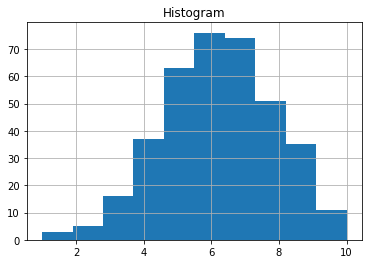

In [7]:
win_by_wickets_data.hist()
plt.title("Histogram")

As we could figure out from the histogram's initial observation, the data has a **normal** distribution<br>

Lets verify the same by modelling different distributions on our data and cross verifying the graphs obtained

Before that, lets first calculate the mean in `ipl_data_mean` using the `mean()` function

In [8]:
ipl_data_mean = win_by_wickets_data.mean()
ipl_data_mean

6.283018867924528

Now, lets calculate the variance in `ipl_data_var` by using `var()` function

In [9]:
ipl_data_var = win_by_wickets_data.var()
ipl_data_var

3.3764405915349354

Let us also calculate the standard deviation in `ipl_data_sd` by using the `sqrt()` function from `math` library

In [10]:
ipl_data_sd = math.sqrt(ipl_data_var)
ipl_data_sd

1.8375093446115955

## Normal Distribution

Lets use **method of moments** to assign the mean and variance to their theoretical counterparts.

We know that, for a Normal distribution 99.7% of all the observations will appear within plus or minus 3 standard deviation of the mean. Hence the lower limit becomes **(mean - 3\*sd)** and the upper limit becomes **(mean + 3\*sd)**

Also, for a normal distribution, the first moment and the second moment are equal to, 

<br>
<div>  
$$ \ First Moment = \bar{X} $$
$$ \ Second Moment = {S^2} $$
</div>

(where $\bar{X}$ is the mean, while $S^2$ is the variance)

Now using the `norm.pdf` function from `scipy.stats.distributions`, we plot the distribution implied by the first and second moment 

Text(0.5, 1.0, 'Normal Distribution')

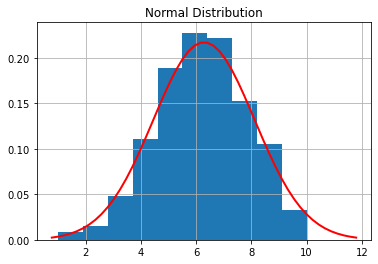

In [11]:
from scipy.stats.distributions import norm

win_by_wickets_data.hist(density=True, bins=10)
plt.plot(np.linspace(ipl_data_mean - 3*ipl_data_sd, ipl_data_mean + 3*ipl_data_sd),
         norm.pdf(np.linspace(ipl_data_mean - 3*ipl_data_sd, ipl_data_mean + 3*ipl_data_sd), ipl_data_mean, ipl_data_sd),
         linewidth = 2, color = 'r')
plt.title("Normal Distribution")

As seen from the plot above, the distribution plot obtained from the method of moments **perfectly fits** over our histogram.

**Thus, we conclude the above distribution is *a Normal Distribution*.**

## Now we also check our data for other PDFs using the Method of Moments

### Gamma Distribution

Lets use **method of moments** to assign ***mean*** and ***variance*** to their **theoretical counterparts**

For gamma distribution, the mean and variance equals:

<br />
<div>  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

Solving for these parameters,

<br />
<div>  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

(where $\bar{X}$ is the mean, while $S^2$ is the variance)

Now, lets calculate the values of the `alpha` and `beta` using the mean and variance values obtained above

In [12]:
alpha_mom = ipl_data_mean**2/ipl_data_var
beta_mom = ipl_data_var/ipl_data_mean
alpha_mom, beta_mom

(11.691698705929138, 0.5373914454995543)

Now using the `gamma.pdf` function from `scipy.stats.distributions`, we plot the distributions implied by the calculated alpha and beta 

Text(0.5, 1.0, 'Gamma Distribution')

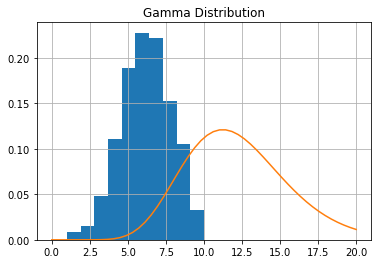

In [13]:
from scipy.stats.distributions import gamma

win_by_wickets_data.hist(density=True, bins=10)
plt.plot(np.linspace(0, 20), gamma.pdf(np.linspace(0, 20), alpha_mom, beta_mom))
plt.title("Gamma Distribution")

As seen from the plot above, the gamma distribution plot does not perfectly fit over our histogram.

**Thus, we conclude the above distribution is *not a Gamma Distribution*.**

### Exponential Distribution

Lets use **method of moments** again to find the necessary parameters

For an Exponential Distribution, the first moment is equal to,

<br>
<div>  
$$ \ First Moment = \bar{X} $$
</div>

(where $\bar{X}$ is the mean)

Also, in order to generate samples, we know that an Exponential Distribution starts at the lowest value in the dataset which we will obtain using the `min()` function on `win_by_wickets_data` and we generate samples upto the 10th wicket using the `max()` function

Now using the `expon.pdf` function from `scipy.stats.distributions`, we plot the distribution implied by the first moment 

Text(0.5, 1.0, 'Exponential Distribution')

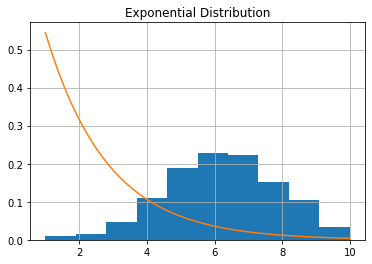

In [14]:
from scipy.stats.distributions import expon

win_by_wickets_data.hist(density=True, bins=10)
plt.plot(np.linspace(win_by_wickets_data.min(), win_by_wickets_data.max()), 
         expon.pdf(np.linspace(win_by_wickets_data.min(), win_by_wickets_data.max()), 
                   win_by_wickets_data.min(), ipl_data_sd))

plt.title("Exponential Distribution")

As seen from the exponential distribution plot above, the distribution plot does not perfectly fit over our histogram.

**Thus, we conclude the above distribution is *not an Exponential Distribution*.**

### Uniform Distribution

Lets use **method of moments** to find the necessary parameters

For Uniform Distribution, the total area under the plot is equal to

<br>
<div>
$$ (b-a) * \frac{1}{(b-a)} = 1 $$
</div>

(where $b$ is the maximum value in the data and $a$ is the minimum value in the data)

Thus, the first two moments are

<br>
<div>  
$$ \ First Moment = a $$
$$ \ Second Moment = b $$
</div>

(where $b$ is the maximum value in the data and $a$ is the minimum value in the data)

Also, in order to generate samples, we know that Uniform Distribution starts at the minimum value in the dataset which we will obtain using the `min()` function on `win_by_wickets_data` and we generate samples upto the 10th wicket using the `max()` function. But for better visibility of graph we will obtain the distribution plot from +/-2 limits

Now using the `uniform.pdf` function from `scipy.stats.distributions`, we plot the distribution implied by the first and second moment 

Text(0.5, 1.0, 'Uniform Distribution')

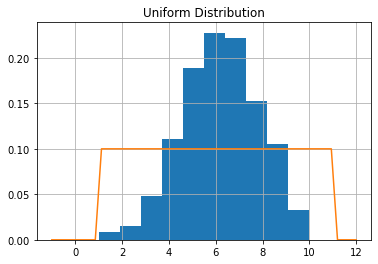

In [15]:
from scipy.stats.distributions import uniform

win_by_wickets_data.hist(density=True, bins=10)
plt.plot(np.linspace(win_by_wickets_data.min() -2 , win_by_wickets_data.max() +2),
         uniform.pdf(np.linspace(win_by_wickets_data.min() -2, win_by_wickets_data.max() +2), 
                     win_by_wickets_data.min(), win_by_wickets_data.max()))

plt.title("Uniform Distribution")

As seen from the uniform distribution plot above, the distribution plot again does not perfectly fit over our histogram.

**Thus, we conclude the distribution is *not a Uniform Distribution*.**

## Thus, we can finally conclude after modelling our data to fit on different PDFs that, the chosen data has a Normal Distribution